# Task 1: 
Data Preprocessing:

Explore and understand the features of the dataset.
Handle any missing values or outliers if present.
Split the dataset into training and testing sets.


In [2]:
#importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import accuracy_score
import keras as ks 

In [8]:
housing_data =fetch_california_housing()

In [9]:
housing_data.keys()
housing_data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [10]:
#Give all data columns in X and and y in target variable 
X = pd.DataFrame(housing_data.data, columns = housing_data.feature_names)
y = housing_data.target

In [11]:
#get the statistical summary of X
X.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [12]:
# check and handle the null vaues
X.isna().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

# Linear Regression:

Implement a Linear Regression model using scikit-learn.
Train the model on the training set.
Make predictions on the testing set.
Evaluate the model's performance using appropriate regression metrics (e.g., Mean Squared Error, R2 Sc

In [14]:
#validate the data --- to check the overfittig during training
#Training my model on a training set and evaluate its performance on both the training and a separate validation set.
#If the training performance is significantly better than the validation performance, it may indicate overfitting.
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state = 42) 


In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((15480, 8), (5160, 8), (15480,), (5160,))

In [17]:
#validation
X_train_full,X_valid,y_train_full, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state = 42)

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train_full)
X_valid_sc = scaler.transform(X_valid)
X_test_sc = scaler.transform(X_test)


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
lr = LinearRegression()
lr.fit(X_train_sc, y_train_full)
y_pred=lr.predict(X_test_sc)
print("mse: ", mean_squared_error(y_test, y_pred))
print("mae: ", mean_absolute_error(y_test, y_pred))
print("r2: ", r2_score(y_test, y_pred))

mse:  0.5437517542538244
mae:  0.5306356717846102
r2:  0.5890686862317929


In [26]:
#training Prediction 
y_pred_train = lr.predict(X_train_sc)
print("mse: ", mean_squared_error(y_train_full, y_pred_train))
print("mae: ", mean_absolute_error(y_train_full, y_pred_train))
print("r2: ", r2_score(y_train_full, y_pred_train))

mse:  0.5247519297475677
mae:  0.5345808134906599
r2:  0.6110162364063001


# Artificial Neural Network (ANN):

Implement a simple ANN for regression using a framework like TensorFlow or Keras.
Design the architecture of the neural network, including the input and output layers.
Train the ANN on the training set.
Make predictions on the testing set.
Evaluate the model's performance using the same regression metrics used for Linear Regression.

In [27]:
#ANN model 
Layers= [ks.layers.Dense(30, activation = 'relu', input_shape= X_train_sc.shape[1:]),
         ks.layers.Dense(10, activation = 'relu'),
         ks.layers.Dense(5, activation = 'relu'),
         ks.layers.Dense(1)
        ]

In [29]:
housingModel_ann=ks.models.Sequential(Layers)
housingModel_ann.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 10)                310       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
#If we have more outliers we use mae for LOSS
LOSS = "mse"
OPTIMIZER = "sgd"
housingModel_ann.compile(optimizer = OPTIMIZER, loss = LOSS)

In [38]:
Epochs = 20
history=housingModel_ann.fit(X_train_sc, y_train_full, epochs=Epochs, validation_data=(X_valid_sc,y_valid))

Epoch 1/20

310/310 [==============================] - 4s 7ms/step - loss: 0.7423 - val_loss: 0.5285
Epoch 2/20
310/310 [==============================] - 2s 5ms/step - loss: 0.4750 - val_loss: 0.4766
Epoch 3/20
310/310 [==============================] - 2s 5ms/step - loss: 0.4827 - val_loss: 0.4778
Epoch 4/20
310/310 [==============================] - 2s 5ms/step - loss: 0.5773 - val_loss: 0.4516
Epoch 5/20
310/310 [==============================] - 2s 5ms/step - loss: 0.4466 - val_loss: 0.4342
Epoch 6/20
310/310 [==============================] - 2s 5ms/step - loss: 0.4235 - val_loss: 0.4216
Epoch 7/20
310/310 [==============================] - 2s 5ms/step - loss: 0.4045 - val_loss: 0.4108
Epoch 8/20
310/310 [==============================] - 2s 5ms/step - loss: 0.3973 - val_loss: 0.4046
Epoch 9/20
310/310 [==============================] - 1s 5ms/step - loss: 0.3857 - val_loss: 0.3943
Epoch 10/20
310/310 [==============================] - 1s 5ms/step - loss: 0.3796 - val_loss: 0.386

<Axes: >

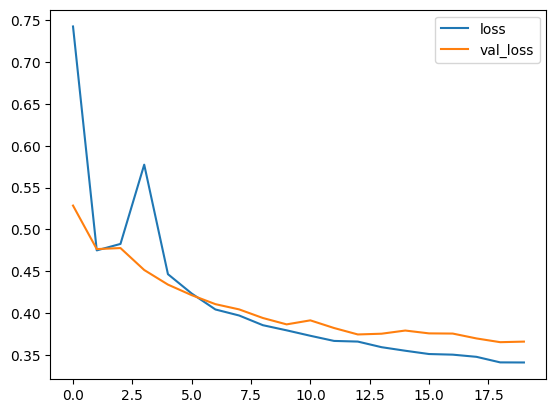

In [39]:
pd.DataFrame(history.history).plot()

In [41]:
housingModel_ann.evaluate(X_test_sc,y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3474


0.347356379032135

In [42]:
y_pred_ann=housingModel_ann.predict(X_test_sc)

162/162 [==============================] - 1s 2ms/step


In [49]:
print('mse: ', mean_squared_error(y_pred_ann, y_test))
print('r2_score: ',r2_score(y_pred_ann, y_test))
print('mae: ',r2_score(y_pred_ann, y_test))

mse:  0.3473563754412899
r2_score:  0.680586715953575
mae:  0.680586715953575


# Comparison and Analysis:

1. **Performance Metrics:**
Linear Regression Metrics:
Mean Squared Error (MSE): 0.5437
R-squared (R2): 0.5891
**ANN Metrics:**
Mean Squared Error (MSE): 0.3474
R-squared (R2): 0.6806

2. **Strengths and Weaknesses:**

Linear Regression:
--Strengths:
Simplicity and interpretability.
Fast training on large datasets.
--Weaknesses:
Limited ability to capture complex relationships.
Assumes linear relationships between features.

Artificial Neural Network (ANN):
--Strengths:
Ability to model complex, non-linear relationships.
Effective for tasks with large amounts of data.
--Weaknesses:
Prone to overfitting, especially on small datasets.
Requires careful tuning of hyperparameters.

3. **Complexity and Predictive Performance:**
The ANN model demonstrates better performance, as indicated by lower MSE and higher R-squared compared to Linear Regression.
The complexity of the ANN, with multiple hidden layers, allows it to learn intricate patterns and relationships in the data, contributing to improved predictive performance.



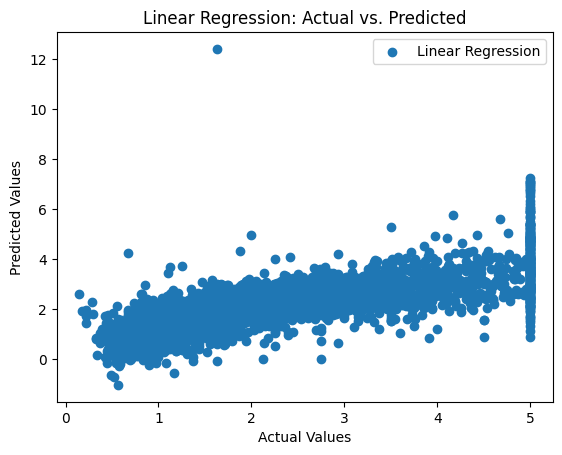

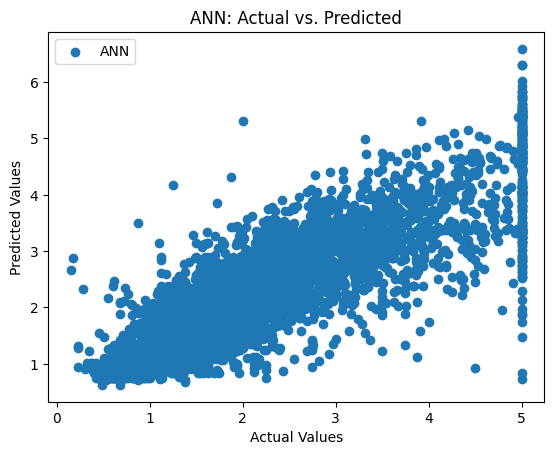

In [52]:
### Visualization:


import matplotlib.pyplot as plt

# Scatter plot for Linear Regression
plt.scatter(y_test, y_pred, label='Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Linear Regression: Actual vs. Predicted')
plt.show()

# Scatter plot for ANN
plt.scatter(y_test, y_pred_ann, label='ANN')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('ANN: Actual vs. Predicted')
plt.show()


### Conclusion:

#### Key Findings:

1. **Model Performance:**
   The Artificial Neural Network (ANN) model outperforms Linear Regression in predicting house prices for the California Housing dataset. The ANN demonstrates lower Mean Squared Error (MSE) and higher R-squared (R2), indicating better predictive performance.

2. **Complexity Matters:**
   The complexity of the ANN architecture, with multiple hidden layers, enables it to capture intricate non-linear relationships in the data. Linear Regression, while interpretable and straightforward, struggles to capture complex patterns.

#### Insights:

3. **Better Model for Prediction:**
   The ANN, with its ability to model complex relationships, is more suitable for predicting house prices in this dataset. The higher R-squared suggests that the ANN explains a larger proportion of the variance in the target variable compared to Linear Regression.

4. **Consideration for Model Choice:**
   The choice between models should consider the nature of the data and the complexity of the underlying relationships. For datasets with non-linear patterns and interactions, more complex models like ANNs may yield better results.

#### Challenges:

5. **Overfitting Concerns:**
   One challenge encountered, especially with ANNs, is the potential for overfitting, particularly on smaller datasets. Addressing overfitting requires careful tuning of hyperparameters and the use of regularization techniques.

6. **Hyperparameter Tuning:**
   The performance of the ANN model can be sensitive to hyperparameter choices. Finding the optimal combination of parameters requires experimentation and tuning to balance model complexity and generalization.

7. **Interpretability Trade-off:**
   While the ANN provides superior predictive performance, it sacrifices some interpretability compared to Linear Regression. Understanding the trade-off between model complexity and interpretability is crucial, depending on the context of the analysis.
